In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split

In [45]:
train = pd.read_csv('/home/praveen/advertisement/train.csv')
test = pd.read_csv('/home/praveen/advertisement/test.csv')
sample = pd.read_csv('/home/praveen/advertisement/sample_submission.csv')

In [46]:
train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [10]:
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [11]:
print(train.shape)
print(test.shape)

(19536, 12)
(6512, 11)


In [12]:
train.describe()

,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [14]:
train.dtypes

UserID                                object
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                int64
dtype: object

In [15]:
train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [16]:
train.nunique()

UserID                               19536
realtionship_status                      7
industry                                 6
genre                                    5
targeted_sex                             2
average_runtime(minutes_per_week)       89
airtime                                  3
airlocation                             42
ratings                                120
expensive                                3
money_back_guarantee                     2
netgain                                  2
dtype: int64

In [17]:
train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [18]:
relation_status = train['realtionship_status'].value_counts()
relation_status

Married-civ-spouse       8899
Never-married            6433
Divorced                 2700
Widowed                   616
Separated                 598
Married-spouse-absent     274
Married-AF-spouse          16
Name: realtionship_status, dtype: int64

/home/praveen/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


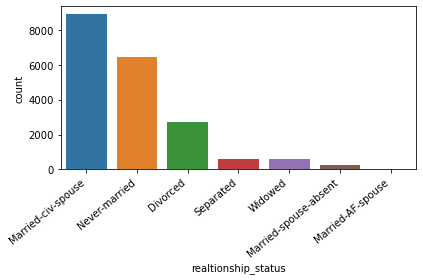

In [19]:
ax=sns.countplot(train['realtionship_status'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

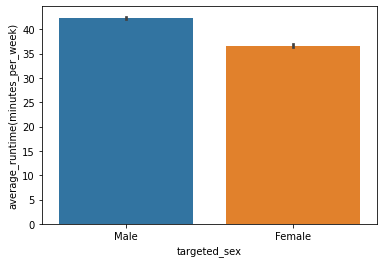

In [20]:
sns.barplot(x='targeted_sex',y='average_runtime(minutes_per_week)',data=train)
plt.show()                                             

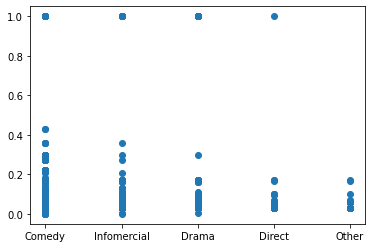

In [21]:
ax=plt.scatter(x='genre',y='ratings',data=train)
plt.show()

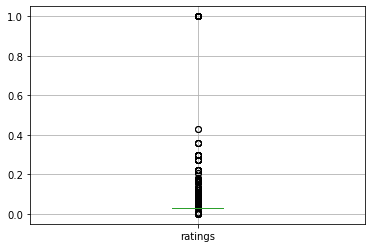

In [22]:
train.boxplot(column=['ratings'])
plt.show()


In [23]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR)
    upper_range = Q3+(1.5*IQR)
    return lower_range,upper_range

In [24]:
lowprice,uppprice = remove_outlier(train['ratings'])
train['ratings']=np.where(train['ratings']>uppprice,uppprice,train['ratings'])
train['ratings']=np.where(train['ratings']<lowprice,lowprice,train['ratings'])

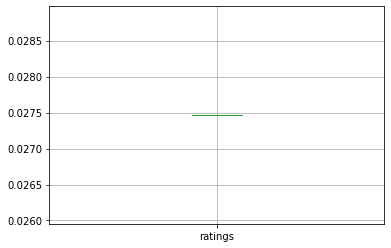

In [25]:
train.boxplot(column=['ratings'])
plt.show()

In [26]:
train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


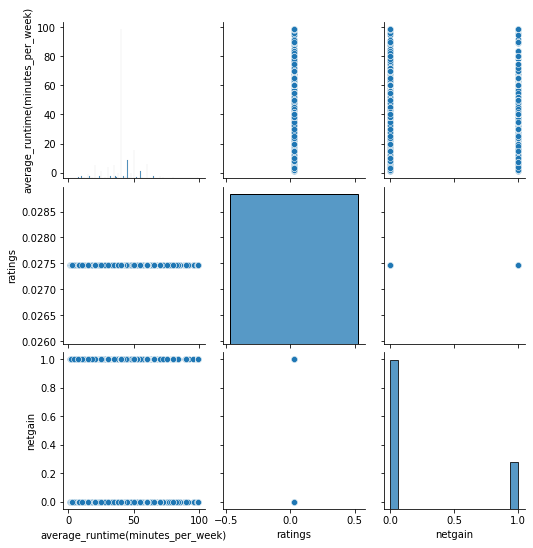

In [27]:
sns.pairplot(train)
plt.show()

<AxesSubplot:>

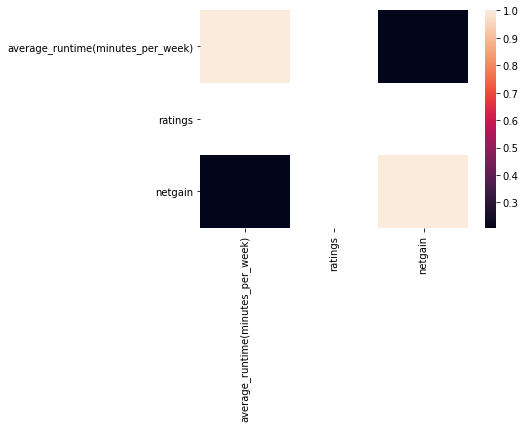

In [28]:
sns.heatmap(train.corr())

In [29]:
from scipy.stats import norm, skew
numeric_feats = train.dtypes[train.dtypes != 'object'].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_feats[abs(skewed_feats) > 0.5]
high_skew

netgain    1.230311
ratings   -1.000000
dtype: float64

/home/praveen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/praveen/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='ratings', ylabel='Density'>

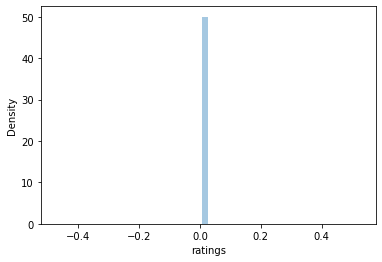

In [30]:
sns.distplot(train['ratings'])

In [31]:
train.corr()

,average_runtime(minutes_per_week),ratings,netgain
average_runtime(minutes_per_week),1.000000,NaN,0.208079
ratings,NaN,NaN,NaN
netgain,0.208079,NaN,1.000000


<AxesSubplot:ylabel='Frequency'>

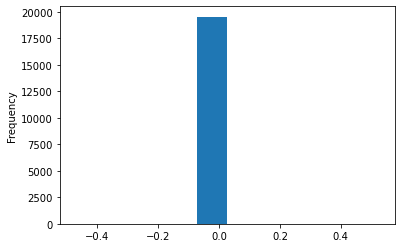

In [32]:
train['ratings'].plot(kind='hist')

In [33]:
count_nan_in_df = train.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_df))

Count of NaN: 0


In [34]:
train.drop(['UserID','industry','airlocation','realtionship_status','genre'], axis=1, inplace=True)

In [35]:
train.head()

,targeted_sex,average_runtime(minutes_per_week),airtime,ratings,expensive,money_back_guarantee,netgain
0,Male,40,Daytime,0.027465,Medium,No,0
1,Male,35,Morning,0.027465,Low,No,0
2,Male,40,Morning,0.027465,Low,No,0
3,Male,40,Primetime,0.027465,Low,Yes,0
4,Female,50,Primetime,0.027465,Low,Yes,1


In [36]:
train['ratings']= train['ratings'].fillna(train['ratings'].max()+10)
train['ratings'] = train['ratings'].fillna(0)

In [37]:
test['ratings']= test['ratings'].fillna(train['ratings'].max()+10)
test['ratings'] = test['ratings'].fillna(0)

In [38]:
train.head()

,targeted_sex,average_runtime(minutes_per_week),airtime,ratings,expensive,money_back_guarantee,netgain
0,Male,40,Daytime,0.027465,Medium,No,0
1,Male,35,Morning,0.027465,Low,No,0
2,Male,40,Morning,0.027465,Low,No,0
3,Male,40,Primetime,0.027465,Low,Yes,0
4,Female,50,Primetime,0.027465,Low,Yes,1


In [39]:
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [40]:
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [41]:
test.drop(['UserID','industry','airlocation','realtionship_status','genre','expensive','money_back_guarantee'],axis=1, inplace=True)

In [42]:
test = pd.get_dummies(test, columns=['targeted_sex','airtime'])

In [43]:
test.head()

,average_runtime(minutes_per_week),ratings,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime
0,40,0.027465,1,0,0,0,1
1,40,0.027465,1,0,0,0,1
2,40,0.027465,0,1,0,0,1
3,30,0.027465,0,1,0,0,1
4,70,0.027465,0,1,0,1,0


In [47]:
train.drop(['UserID','industry','airlocation','realtionship_status','genre','expensive','money_back_guarantee'], axis=1, inplace=True)

In [48]:
train = pd.get_dummies(train, columns=['targeted_sex','airtime'])

In [49]:
train.head()

,average_runtime(minutes_per_week),ratings,netgain,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime
0,40,0.027465,0,0,1,1,0,0
1,35,0.027465,0,0,1,0,1,0
2,40,0.027465,0,0,1,0,1,0
3,40,0.027465,0,0,1,0,0,1
4,50,0.027465,1,1,0,0,0,1


In [50]:
train['ratings'].corr(train['ratings'])

1.0

In [51]:
train_corr=train.corr()

In [52]:
train_corr

,average_runtime(minutes_per_week),ratings,netgain,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime
average_runtime(minutes_per_week),1.000000,0.076133,0.208079,-0.217925,0.217925,-0.148976,-0.171504,0.242480
ratings,0.076133,1.000000,0.230971,-0.040149,0.040149,0.043538,-0.071942,0.046147
netgain,0.208079,0.230971,1.000000,-0.199733,0.199733,0.017136,-0.283178,0.262476
targeted_sex_Female,-0.217925,-0.040149,-0.199733,1.000000,-1.000000,-0.015281,0.093842,-0.081949
targeted_sex_Male,0.217925,0.040149,0.199733,-1.000000,1.000000,0.015281,-0.093842,0.081949
airtime_Daytime,-0.148976,0.043538,0.017136,-0.015281,0.015281,1.000000,-0.192669,-0.339390
airtime_Morning,-0.171504,-0.071942,-0.283178,0.093842,-0.093842,-0.192669,1.000000,-0.857631
airtime_Primetime,0.242480,0.046147,0.262476,-0.081949,0.081949,-0.339390,-0.857631,1.000000


In [53]:
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [54]:
X = train['netgain']
y = train['ratings']
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.75,random_state=0)

In [79]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(y_pred)

[0 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 1 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1
 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 0 

In [82]:
final = lr.predict(X)
final

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,

In [55]:
def get_best_features(df, n=10):
    df1 = df.copy().select_dtypes(include=np.number)
    X = df1.copy()  #independent columns
    X.drop('netgain', axis=1, inplace=True)
    y = df1['netgain']    #target column 
    #apply SelectKBest class to extract top n best features
    bestfeatures = SelectKBest(score_func=chi2, k=n)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(n,'Score'))  #print n best features
    return featureScores.nlargest(n,'Score')

In [56]:
def get_feature_importance(df, k=15):
    df1 = df.copy().select_dtypes(include=np.number)
    X = df1.copy()  #independent columns
    X.drop('netgain', axis=1, inplace=True)
    y = df1['netgain']    #target column 
    model = ExtraTreesClassifier()
    model.fit(X,y)
    print(model.feature_importances_)
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(k).plot(kind='barh')
    plt.show()

[0.16827698 0.45415512 0.06611508 0.05781879 0.01074683 0.12239423
 0.12049297]


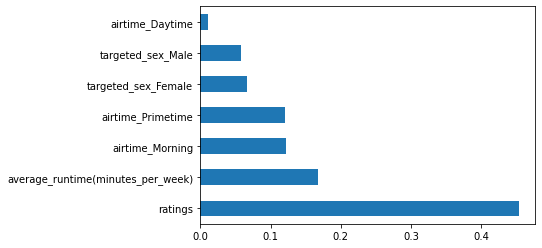

In [57]:
from sklearn.ensemble import ExtraTreesClassifier
get_feature_importance(train)

In [58]:
X.shape , y.shape

((19536,), (19536,))

In [59]:
act_pos = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_pos2 + act_neg


In [60]:
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

In [61]:
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.677


In [62]:
from sklearn.metrics import recall_score
act_pos = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_pos2 + act_neg

In [63]:
pred_pos1 = [0 for _ in range(23)] + [1 for _ in range(77)]
pred_pos2 = [0 for _ in range(5)] + [2 for _ in range(95)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

In [64]:
recall = recall_score(y_true, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.860


In [65]:
score1 = (2 * precision * recall) / (precision + recall)

In [66]:
print(score1)

0.7577764636309876


In [67]:
test.shape

(6512, 11)

In [68]:
sample.shape

(6512, 1)

In [69]:
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      0.77      0.87       100
           2       1.00      0.95      0.97       100

    accuracy                           1.00     10200
   macro avg       1.00      0.91      0.95     10200
weighted avg       1.00      1.00      1.00     10200



In [83]:
submission = pd.DataFrame()
submission['netgain']=final
submission.to_csv('/home/praveen/advertisement/sample_submission1.csv',index=False)

In [81]:
sample.columns

Index(['netgain'], dtype='object')